In [7]:
import numpy as np

# Define activation functions and its devirative
# Identity
def identity(yhat):
    return yhat
# Sigmoid
def activation(yhat):
    return 1 / (1 + np.exp(-yhat))
# ReLU
def relu(yhat):
    return abs(yhat) * (yhat >= 0)
#    return 0 * (yhat < 0)
def d_relu(yhat):
    return 1 * (yhat >= 0)
#    return 0 * (x < 0)

# Compute cost function
h = 1000
alpha = 0.05
J = np.zeros([1, h])
cost_sample = []
cost = []

data = np.loadtxt("pattern_rand.csv", delimiter=",", skiprows=1)
X_train = data[0:320, 0:2].T
X_test = data[320:, 0:2].T
Y_train = data[0:320, 2:].T
Y_test = data[320:, 2:].T

# Train set
X0 = X_train
Y = Y_train
# Initialization
n = 2
m = X0.shape[1]
G0 = np.zeros([n, m])
G1 = np.zeros([4, m])
G2 = np.zeros([1, m])
dGdW1 = np.zeros([1, m])
dJdW1 = np.zeros([1, n])
dJdb1 = 0
dGdW2 = np.zeros([1, m])
dJdW2 = np.zeros([1, n])
dJdb2 = 0
# Model Parameters
b0 = 0
b1 = 0
b2 = 1
W0 = np.eye(2)
W1_1 = np.eye(2)
W1_2 = np.zeros([2, 2])
W1 = np.vstack([W1_1, W1_2])
W2 = np.full([1, 4], 1)
# Initialization of X, H, B and Yhat
H0 = np.zeros([n, m])
H1 = np.zeros([4, m])
H2 = np.zeros([1, m])
X1 = np.zeros([n, m])
X2 = np.zeros([4, m])
Yhat = np.zeros([1, m])
B0 = np.ones([n, 1])
B1 = np.ones([4, 1])
B2 = np.ones([1, 1])

# Loop
for g in range(h):
    # layer 0
    G0 = np.dot(W0, X0) + b0 * B0
    H0 = identity(G0)
    # layer 1
    X1 = H0
    G1 = np.dot(W1, X1) + b1 * B1
    H1 = relu(G1)
    # layer 2
    X2 = H1
    G2 = np.dot(W2, X2) + b2 * B2
    H2 = activation(G2)
    # Cost function
    Yhat = H2
    J[0, g] = (-1 / m) * np.sum((Y * np.log(Yhat)) + (1 - Y) * np.log(1 - Yhat))
    # Update W2
    dGdW2 = Y - Yhat
    dJdb2 = (-1 / m) * np.sum(dGdW2)
    dJdW2 = (-1 / m) * np.dot(dGdW2, X2.T)
    b2 = b2 - alpha * dJdb2
    W2 = W2 - alpha * dJdW2
    # Update W1
    dGdW1 = np.dot(W2.T, dGdW2) * d_relu(G1)
    dJdb1 = (-1 / m) * np.sum(dGdW1)
    dJdW1 = (-1 / m) * np.dot(dGdW1, X1.T)
    b1 = b1 - alpha * dJdb1
    W1 = W1 - alpha * dJdW1
    # Record cost function
    if g % 100 == 0:
        cost_sample.append(J[0, g])
    cost.append(J[0, g])
        
    for i in range(m):
        if Yhat[0, i] > 0.5:
            Yhat[0, i] = 1
        else:
            Yhat[0, i] = 0
        
print("b2 = {}".format(b2))
print("W2 = ", W2)
print("b1 = {}".format(b1))
print("W1 = ", W1)
print("Cost sample = {}".format(cost_sample))

b2 = -0.19474271702955998
W2 =  [[ 0.46481367  0.59191156  1.00000419  1.00000419]]
b1 = -0.34422516710405987
W1 =  [[ 0.62759178 -0.23824469]
 [-0.15219613  0.09509001]
 [-0.00290131 -0.01961629]
 [-0.00290131 -0.01961629]]
Cost sample = [1.5381254867704481, 0.69502701730107086, 0.68540314917230827, 0.68413490885128136, 0.68352961474218266, 0.68311745605977492, 0.68283776757242853, 0.6826450261226934, 0.68244087021901245, 0.68224598858375385]


In [8]:
a = 0
for i in range(m):
    if Yhat[0, i] == Y_train[0, i]:
        a += 1
print("The accuracy of Train set is {}".format(a / m))

The accuracy of Train set is 0.603125


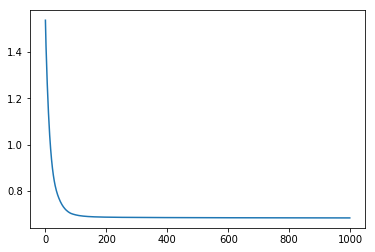

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots()

plt.plot(cost)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
plt.show()

In [16]:
# Test set
X0 = X_test
Y = Y_test
# Initialization
n = 2
m = X0.shape[1]
G0 = np.zeros([n, m])
G1 = np.zeros([4, m])
G2 = np.zeros([1, m])
dGdW1 = np.zeros([1, m])
dJdW1 = np.zeros([1, n])
dJdb1 = 0
dGdW2 = np.zeros([1, m])
dJdW2 = np.zeros([1, n])
dJdb2 = 0
# Model Parameters
b0 = 0
b1 = 0
b2 = 1
W0 = np.eye(2)
W1_1 = np.eye(2)
W1_2 = np.zeros([2, 2])
W1 = np.vstack([W1_1, W1_2])
W2 = np.full([1, 4], 1)
# Initialization of X, H, B and Yhat
H0 = np.zeros([n, m])
H1 = np.zeros([4, m])
H2 = np.zeros([1, m])
X1 = np.zeros([n, m])
X2 = np.zeros([4, m])
Yhat = np.zeros([1, m])
B0 = np.ones([n, 1])
B1 = np.ones([4, 1])
B2 = np.ones([1, 1])

# Loop
for g in range(h):
    # layer 0
    G0 = np.dot(W0, X0) + b0 * B0
    H0 = identity(G0)
    # layer 1
    X1 = H0
    G1 = np.dot(W1, X1) + b1 * B1
    H1 = relu(G1)
    # layer 2
    X2 = H1
    G2 = np.dot(W2, X2) + b2 * B2
    H2 = activation(G2)
    # Cost function
    Yhat = H2
    J[0, g] = (-1 / m) * np.sum((Y * np.log(Yhat)) + (1 - Y) * np.log(1 - Yhat))
    # Update W2
    dGdW2 = Y - Yhat
    dJdb2 = (-1 / m) * np.sum(dGdW2)
    dJdW2 = (-1 / m) * np.dot(dGdW2, X2.T)
    b2 = -0.19474271702955998
    W2 = np.array([[0.46481367, 0.59191156, 1.00000419, 1.00000419]])
    # Update W1
    dGdW1 = np.dot(W2.T, dGdW2) * d_relu(G1)
    dJdb1 = (-1 / m) * np.sum(dGdW1)
    dJdW1 = (-1 / m) * np.dot(dGdW1, X1.T)
    b1 = -0.34422516710405987
    W1 = np.array([[0.62759178, -0.23824469], [-0.15219613, 0.09509001], [-0.00290131, -0.01961629], [-0.00290131, -0.01961629]])
        
    for i in range(m):
        if Yhat[0, i] > 0.5:
            Yhat[0, i] = 1
        else:
            Yhat[0, i] = 0
        
print("Jcost = {}".format(J[0, h-1]))

Jcost = 0.6983269611813547


In [17]:
a = 0
for i in range(m):
    if Yhat[0, i] == Y_test[0, i]:
        a += 1
print("The accuracy of Test set is {}".format(a / m))

The accuracy of Test set is 0.55
